In this notebook i will implement the 7 items that Mr. Noorafrooz required for the article.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn import preprocessing
pd.options.display.max_columns = 200
sns.set_theme(style='darkgrid')

In [2]:
atu = pd.read_csv('data/allameh.csv')
atu['University'] = "Allameh Tabataba'i University"

aut = pd.read_csv('data/amirkabir.csv')
aut['University'] = "Amir Kabir University"

sbu = pd.read_csv('data/beheshti.csv')
sbu['University'] = "Shahid Beheshti University"

fum = pd.read_csv('data/ferdowsi.csv')
fum['University'] = "Ferdowsi University of Mashhad"

ugui = pd.read_csv('data/guilan.csv')
ugui['University'] = "University of Guilan"

ihu = pd.read_csv('data/imamhosein.csv')
ihu['University'] = "Imam Hossein University"

uisf = pd.read_csv('data/isfahan.csv')
uisf['University'] = "University of Isfahan"

iut = pd.read_csv('data/iut.csv')
iut['University'] = "Isfahan University of Technology"

knu = pd.read_csv('data/knu.csv')
knu['University'] = "K. N. Toosi University of Technology"

sut = pd.read_csv('data/sharif.csv')
sut['University'] = "Sharif University of Technology"

ushi = pd.read_csv('data/shiraz.csv')
ushi['University'] = "University of Shiraz"

iust = pd.read_csv('data/stu.csv')
iust['University'] = "Iran University of Science and Technology"

utab = pd.read_csv('data/tabriz.csv')
utab['University'] = "University of Tabriz"

tmu = pd.read_csv('data/tarbiatmodares.csv')
tmu['University'] = "Tarbiat Modares University"

uteh = pd.read_csv('data/ut.csv')
uteh['University'] = "University of Tehran"

In [3]:
df = pd.concat([atu, aut, sbu, fum, ugui, ihu, uisf, iut,
                knu, sut, ushi, iust, utab, tmu, uteh])

df.drop(['Authors at my Institution', 'Departments', 'Journal ISSNs', 'Sustainable Development Goals', 'ISBN', 'National Clinical Trial ID', 'URI', 'PubMed ID', 'PubMedCentral ID', 'Handle.net IDs', 'ADS Bibcode', 'arXiv ID', 'RePEc ID', 'SSRN', 'URN', 'Details Page URL', 'Badge URL', 'Syllabi mentions', 'DOI', 'Funder'], axis=1, inplace=True)

df.columns = df.columns.str.replace(' ', '_')
df = df.reset_index(drop=True)

df['Subjects_(FoR)'].fillna('00 No Category', inplace=True)
df['Journal/Collection_Title'].fillna('No Title', inplace=True)
main_lst = []
for record in df['Subjects_(FoR)'].str.split('; '):
    temp_lst = []
    for element in record:
        if len(element.split(' ')[0]) == 2:
            temp_lst.append(element)
    main_lst.append(temp_lst)
temp_df = pd.DataFrame(main_lst, columns=[
    'Category_1',
    'Category_2',
    'Category_3',
    'Category_4',
    'Category_5',
    'Category_6',
    'Category_7',
])
temp_df.fillna('00 No Category', inplace=True)
df = pd.concat([df, temp_df], axis=1)

label_encoder = preprocessing.LabelEncoder()
df['Journal/Collection_Title_LE'] = label_encoder.fit_transform(df['Journal/Collection_Title'])
df['Output_Type_LE'] = label_encoder.fit_transform(df['Output_Type'])
df['OA_Status_LE'] = label_encoder.fit_transform(df['OA_Status'])
df['OA_Type_LE'] = label_encoder.fit_transform(df['OA_Type'])
df['Publisher_Names_LE'] = label_encoder.fit_transform(df['Publisher_Names'])
df['University_LE'] = label_encoder.fit_transform(df['University'])
df['Category_1_LE'] = label_encoder.fit_transform(df['Category_1'])
df['Category_2_LE'] = label_encoder.fit_transform(df['Category_2'])
df['Category_3_LE'] = label_encoder.fit_transform(df['Category_3'])
df['Category_4_LE'] = label_encoder.fit_transform(df['Category_4'])
df['Category_5_LE'] = label_encoder.fit_transform(df['Category_5'])
df['Category_6_LE'] = label_encoder.fit_transform(df['Category_6'])
df['Category_7_LE'] = label_encoder.fit_transform(df['Category_7'])
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'])

## 7 newly features required by the Mr. Noorafrooz for the article.

### 1

In [5]:
def custom_sum(df):
    sum = df.describe()
    sum.loc['sum'] = df.sum()
    return sum

output = df[['Altmetric_Attention_Score', 'News_mentions',
             'Blog_mentions', 'Policy_mentions', 'Patent_mentions',
             'Twitter_mentions', 'Peer_review_mentions', 'Weibo_mentions',
             'Facebook_mentions', 'Wikipedia_mentions', 'Google+_mentions',
             'LinkedIn_mentions', 'Reddit_mentions', 'Pinterest_mentions',
             'F1000_mentions', 'Q&A_mentions', 'Video_mentions',
             'Number_of_Mendeley_readers', 'Number_of_Dimensions_citations']]
output = output.apply(custom_sum).T[['sum','mean', 'min', 'max']]
output.sort_values(by='sum', ascending=False)
output.to_csv('Output_Tbls_Plots/1.csv', index=False)
output

,sum,mean,min,max
Altmetric_Attention_Score,227000.0,3.067195,0.0,4568.0
News_mentions,10282.0,0.138929,0.0,290.0
Blog_mentions,2929.0,0.039576,0.0,34.0
Policy_mentions,1349.0,0.018228,0.0,12.0
Patent_mentions,11980.0,0.161872,0.0,248.0
Twitter_mentions,182797.0,2.469929,0.0,8949.0
Peer_review_mentions,1541.0,0.020822,0.0,19.0
Weibo_mentions,14.0,0.000189,0.0,4.0
Facebook_mentions,6056.0,0.081828,0.0,109.0
Wikipedia_mentions,5302.0,0.071640,0.0,227.0


### 2

In [6]:
output = df.sort_values(by='Altmetric_Attention_Score', ascending=False)[:30]\
  .iloc[:, :9]\
  .reset_index()
output.to_csv('Output_Tbls_Plots/2.csv', index=False)
output

,index,Altmetric_Attention_Score,Title,Journal/Collection_Title,Output_Type,OA_Status,OA_Type,Subjects_(FoR),Affiliations_(GRID),Publication_Date
0,57815,4568,Ivermectin: a systematic review from antiviral...,Journal of Antibiotics,Article,True,bronze,11 Medical and Health Sciences; 1108 Medical M...,Ahvaz Jundishapur University of Medical Scienc...,2020-06-12
1,57816,3149,Global quieting of high-frequency seismic nois...,Science,Article,True,bronze,04 Earth Sciences; 0404 Geophysics; 37 Earth S...,August Pi i Sunyer Biomedical Research Institu...,2020-09-11
2,57817,2766,Origins and genetic legacy of prehistoric dogs,Science,Article,True,green,06 Biological Sciences; 0604 Genetics; 21 Hist...,Arheološki Institut; Baylor University; Centre...,2020-10-30
3,48945,2043,Ancient genomes revisit the ancestry of domest...,Science,Article,True,green,21 History and Archaeology; 2101 Archaeology; ...,Abdul Wali Khan University Mardan; Al-Farabi K...,2018-04-06
4,57818,2043,Ancient genomes revisit the ancestry of domest...,Science,Article,True,green,21 History and Archaeology; 2101 Archaeology; ...,Abdul Wali Khan University Mardan; Al-Farabi K...,2018-04-06
5,0,1629,COVID-19 and male reproductive function: a pro...,Reproduction,Article,True,bronze,11 Medical and Health Sciences; 1114 Paediatri...,Allameh Tabataba'i University; University of G...,2021-03-01
6,57819,1502,The origins and spread of domestic horses from...,Nature,Article,True,hybrid,21 History and Archaeology; 2101 Archaeology; ...,Abdul Wali Khan University Mardan; Academy of ...,2021-10-20
7,6214,1410,Relationship between blood clots and COVID-19 ...,Open Life Sciences,Article,True,gold,06 Biological Sciences; 31 Biological Sciences,Pasteur Institute of Iran; Shahid Beheshti Uni...,2022-04-26
8,28021,1367,"Mapping 123 million neonatal, infant and child...",Nature,Article,True,hybrid,11 Medical and Health Sciences; 1117 Public He...,Aarhus University; Addis Ababa University; Afr...,2019-10-16
9,48946,1367,"Mapping 123 million neonatal, infant and child...",Nature,Article,True,hybrid,11 Medical and Health Sciences; 1117 Public He...,Aarhus University; Addis Ababa University; Afr...,2019-10-16


### 3

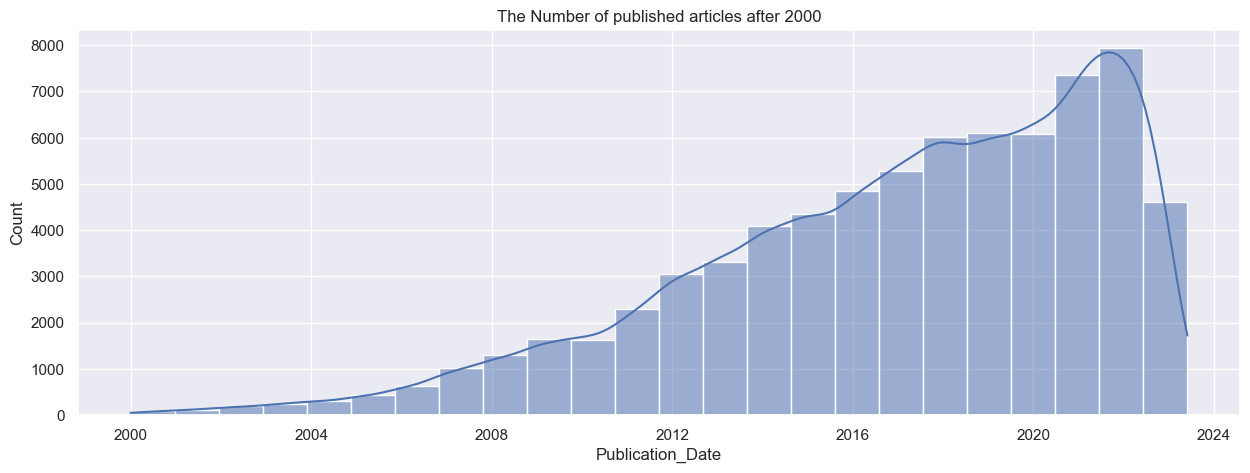

In [10]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df.loc[df['Publication_Date'].dt.year >= 2000], x='Publication_Date', kde=True, bins=df[df['Publication_Date'].dt.year >= 2000]['Publication_Date'].dt.year.nunique())
ax.bar_label(ax.containers[0])
plt.title('The Number of published articles after 2000')
plt.savefig('Output_Tbls_Plots/3.png', facecolor='white')
plt.show()

### 4

In [29]:
output = df['Altmetric_Attention_Score'].groupby(df['Publication_Date'].dt.year).agg(['count', 'sum', 'min', 'max', 'mean'])
output.to_csv('Output_Tbls_Plots/4.csv')
output

,count,sum,min,max,mean
Publication_Date,,,,,
1947.0,1,6,6,6,6.000000
1960.0,1,14,14,14,14.000000
1961.0,1,3,3,3,3.000000
1966.0,1,3,3,3,3.000000
1967.0,3,6,0,3,2.000000
...,...,...,...,...,...
2019.0,6136,24633,0,1367,4.014505
2020.0,6750,32740,0,4568,4.850370
2021.0,8264,30454,0,1629,3.685140


### 5

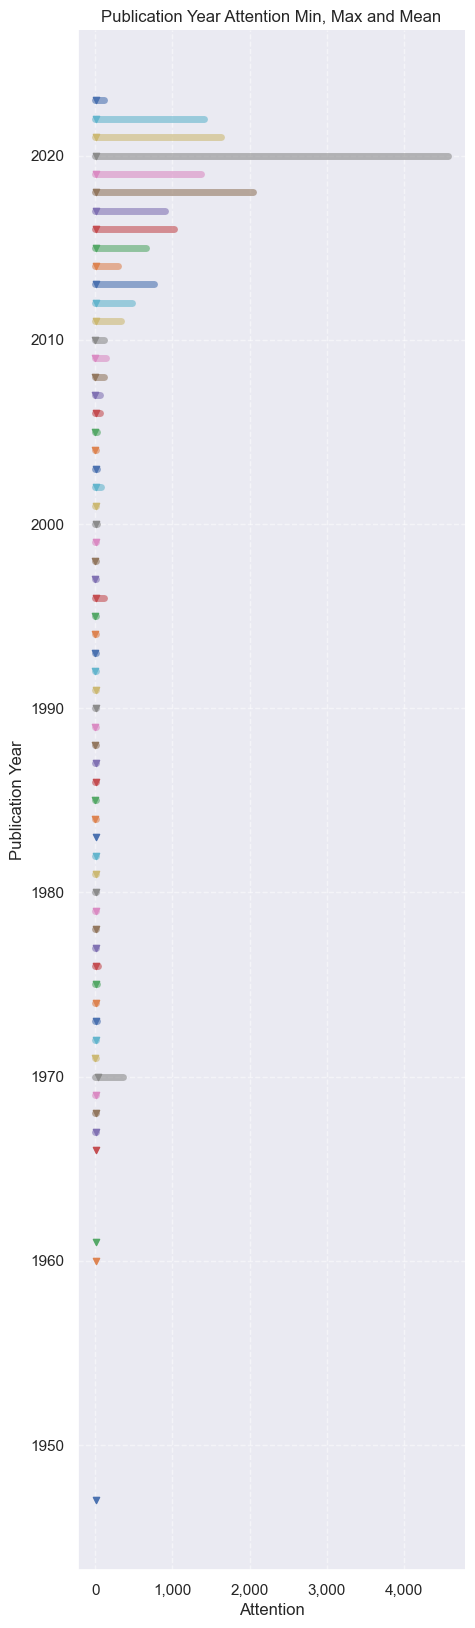

AttributeError: 'Axes' object has no attribute 'savefig'

In [30]:
output = output.reset_index()
y = output['Publication_Date']
x1 = output['min']
x2 = output['max']
point = output['mean']

fig = plt.figure(figsize=(5, 20))
ax = fig.add_subplot()

for x1_, x2_, y_, point_ in zip(x1, x2, y, point):
    ax.plot([int(x1_), int(x2_)], [y_, y_], linewidth=5, alpha=.6)
    ax.scatter(point_, y_, s=20, marker='v')

ax.grid(linestyle='--', alpha=0.5)
ax.set_title('Publication Year Attention Min, Max and Mean')
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")
ax.set_ylabel('Publication Year')
ax.set_xlabel('Attention')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig('Output_Tbls_Plots/5.png', facecolor='white')